

#### The 67th Annual Conference of International Communication Association (ICA 2017)


***
***
# Analyzing Mobile Phone Data With Network Science
***
***

**Cheng-Jun Wang** ; **Xinzhi Zhang** 

The Panel Session of [Temporal and Spatial Analysis of Mobility Data](http://tinyurl.com/hpw4buw)

Sat, May 27, 12:30 to 13:45, 2017; Hilton San Diego Bayfront, 3, Aqua 307, San Diego, USA




# Authors

***

[Cheng-Jun Wang](http://chengjunwang.com/) is currently an assistant research fellow in the School of Journalism and Communication, Nanjing University. He is the director of Ogilvy Data Science Lab, and also a research member of Computational Communication Collaboratory and Web Mining Lab. His research on computational communication appears in both SSCI and SCI indexed journals, such as Scientific Reports, PloS ONE, Physica A, Cyberpsychology.

***
[Xinzhi Zhang](https://sites.google.com/site/xzzhang2/home) is currently a Research Assistant Professor at the Department of Journalism of Hong Kong Baptist University. His research interests include political communication, new media and social change, social movements, languages and social interaction, and comparative politics. He is also an observer of computational social sciences and digital humanities. His research work has appeared in peer-reviewed journals such as International Political Science Review, Computers in Human Behavior, International Journal of Communication, Telecommunications Policy, International Communication Gazette, and Policy & Internet. 

# Content
***
***

- Introduction
    - Computational Social Science
    - Network Science
    - Mobile Phone Data
- Human Mobility Research
- Tutorials
    - Introducing NetworkX with Karate Club Graph Data
- Discussion
    - Computational Communication


# Introduction
***
- **Computational Social Science**, Lazer et al (2009); Watts (2007)
    - Network Science
    - Big Data
        - Website Logs and Web-based Experiment
    
> If handled appropriately, **data about Internet-based communication and interactivity** could revolutionize our understanding of **collective human behaviour**. D. Watts, A twenty-first century science. Nature 445, 489 (2007).



# Introduction
***

### Network Science

> **We live life in the network**. Lazer et al (2009)

> Complex networks have been studied extensively owing to their **relevance to many real systems** such as the world-wide web, the Internet, energy landscapes and biological and social networks. Song et al (2005)

Network Science is more closely conneted with the social data, especially compared with simulations, such as agent-based models. 

# Introduction
***

### Mobile Phone Data

- Calling & Messaging Data
- Online surfing Data
- <del>**Mobility Data**</del>


> “It's been really transformative,” says Michael Macy, a social scientist at Cornell and one of 15 co-authors of a 2009 manifesto seeking to raise the profile of the new discipline. “We were limited before to surveys, which are retrospective, and lab experiments, which are almost always done on small numbers of college sophomores.”

>  The digital data-streams promise a portrait of individual and group behaviour at unprecedented scales and levels of detail.

> From: Jim Giles 2012 Computational social science: Making the links. Nature News


# Human Mobility Research
***



- Song, C., Qu, Z., Blumm, N., & Barabási, A. L. (2010). Limits of predictability in human mobility. Science, 327(5968), 1018.
- Song, C., Koren, T., Wang, P., & Barabási, A. (2010). Modelling the scaling properties of human mobility. Nature Physics, 6(10), 818-823.
- González, M. C., Hidalgo, C. A., & Barabási, A. L. (2008). Understanding individual human mobility patterns. Nature, 453(7196), 779-82.



# Human Mobility Research
***

NYC Taxi Trips Data http://www.andresmh.com/nyctaxitrips/

# NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. http://networkx.github.io/

http://networkx.readthedocs.org/en/networkx-1.11/tutorial/

- Python language data structures for graphs, digraphs, and multigraphs.
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g. text, images, XML records)
- Edges can hold arbitrary data (e.g. weights, time-series)
- Open source BSD license
- Well tested: more than 1800 unit tests, >90% code coverage
- Additional benefits from Python: fast prototyping, easy to teach, multi-platform


In [15]:
%matplotlib inline

import networkx as nx 
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

G =nx.random_graphs.barabasi_albert_graph(40,2)      #generate a BA network 

In [11]:
# Degree distribution
def plotDegreeDistribution(G, loglog):
    degs = defaultdict(int)
    for i in G.degree().values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o', alpha = .3)
    if loglog == True:
        plt.xscale('log')
        plt.yscale('log')
    else:
        pass
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)

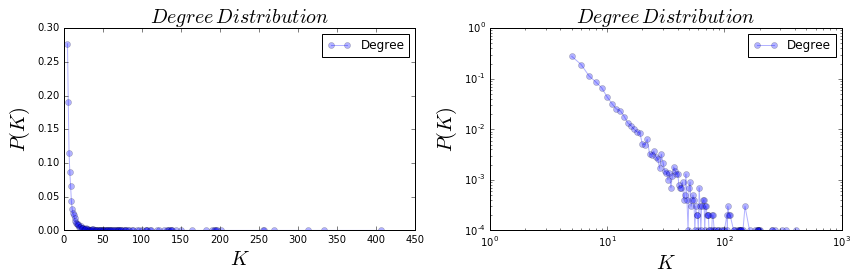

In [16]:
ba =nx.random_graphs.barabasi_albert_graph(10000,5)      # generate a BA network 

fig = plt.figure(figsize=(12, 4),facecolor='white')
ax = fig.add_subplot(1,2,1)
plotDegreeDistribution(ba, loglog = False)
ax = fig.add_subplot(1,2,2)
plotDegreeDistribution(ba, loglog = True)
plt.tight_layout()


### karate club graph

- A social network of a karate club was studied by *Wayne W. Zachary* for a period of three years from 1970 to 1972.
- The network captures 34 members of a karate club, documenting 78 pairwise links between members who interacted outside the club.
- During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi", which led to the split of the club into two. 
    - Half of the members formed a new club around Mr. Hi
    - members from the other part found a new instructor or gave up karate. 
    
Wayne W. Zachary. **An Information Flow Model for Conflict and Fission in Small Groups**. Journal of Anthropological Research. 33: 4 (1977), pp. 452-473

In [2]:
# more on network visualization
kcg = nx.karate_club_graph()

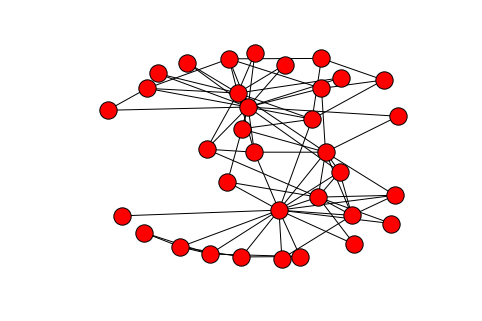

In [3]:
# plot a network
nx.draw(kcg) 

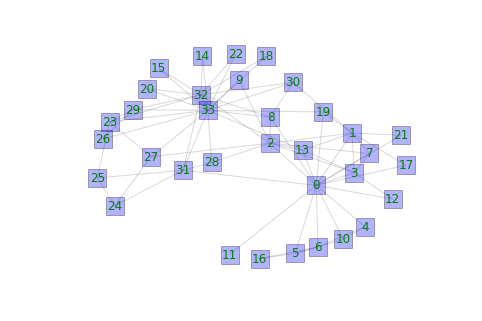

In [10]:
# more on network visualization
pos = nx.spring_layout(kcg)   #spring_layout： 用Fruchterman-Reingold算法排列节点，默认布局方式      
#pos = nx.spectral_layout(kcg)      #spectral_layout：根据图的拉普拉斯特征向量排列节点    

nx.draw(kcg, pos, node_color = 'b', node_shape = 's', alpha = 0.3, 
        edge_color ='grey', with_labels=True, font_size=12, font_color='g')                       

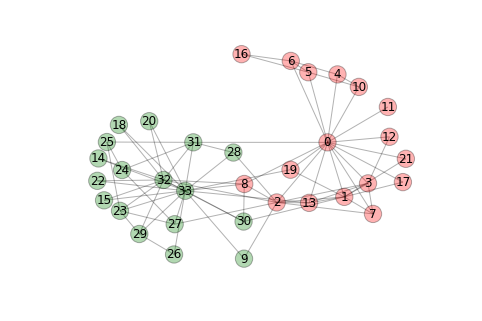

In [9]:
clubs = [kcg.node[i]['club'] for i in kcg.nodes()]
colors = []
for j in clubs:
    if j == 'Mr. Hi':
        colors.append('r')
    else:
        colors.append('g')

nx.draw(kcg,  with_labels = True, node_color = colors, alpha = 0.3)

In [147]:
nx.info(kcg)

"Name: Zachary's Karate Club\nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882"

In [116]:
nx.average_shortest_path_length(kcg)

2.408199643493761

In [115]:
nx.diameter(kcg)

5

In [113]:
nodeNum = len(kcg.nodes())
edgeNum = len(kcg.edges())

print 2.0*edgeNum/(nodeNum * (nodeNum - 1)), nx.density(kcg)


 0.139037433155 0.139037433155


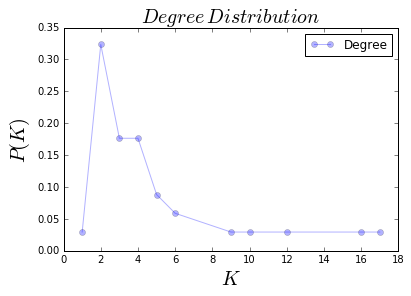

In [144]:
plotDegreeDistribution(kcg, loglog = False)

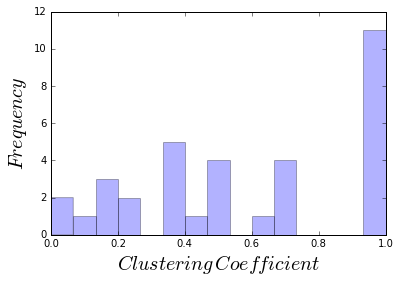

In [145]:
cc = nx.clustering(kcg)
plt.hist(cc.values(), bins = 15, alpha = .3)
plt.xlabel('$Clustering \, Coefficient$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
plt.show()

In [85]:
# M. E. J. Newman, Mixing patterns in networks Physical Review E, 67 026126, 2003
nx.degree_assortativity_coefficient(kcg) 

-0.47561309768461457

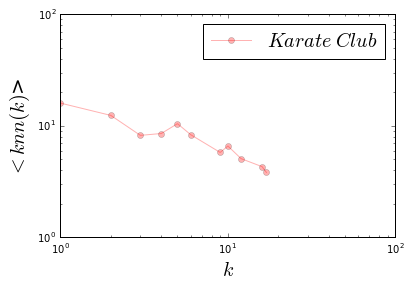

In [88]:
# plot degree correlation  
from collections import defaultdict
import numpy as np

l=defaultdict(list)
for i in kcg.nodes():
    k = []
    for j in kcg.neighbors(i):
        k.append(kcg.degree(j))
    l[kcg.degree(i)].append(np.mean(k))   
    
x = l.keys()
y = [np.mean(i) for i in l.values()]

plt.plot(x, y, 'r-o', label = '$Karate\;Club$', alpha = 0.3)
plt.legend(loc=1,fontsize=20, numpoints=1)
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'$<knn(k)$> ', fontsize = 20)
plt.xlabel('$k$', fontsize = 20)
plt.show()

In [89]:
dc = nx.degree_centrality(kcg)
closeness = nx.closeness_centrality(kcg)
betweenness= nx.betweenness_centrality(kcg)

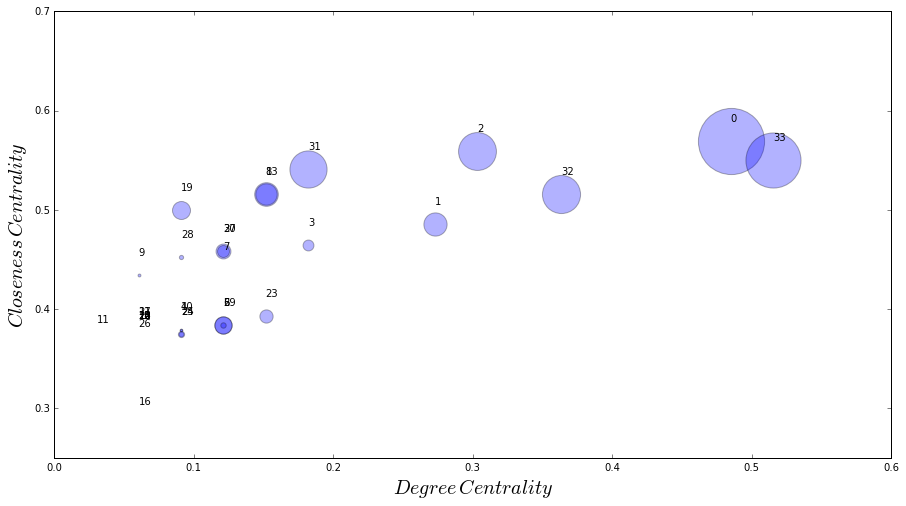

In [94]:
fig = plt.figure(figsize=(15, 8),facecolor='white')

for k in betweenness:
    plt.scatter(dc[k], closeness[k], s = betweenness[k]*10000, alpha = .3)
    plt.text(dc[k], closeness[k]+0.02, str(k))
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Closeness \, Centrality$', fontsize = 20)
plt.show()

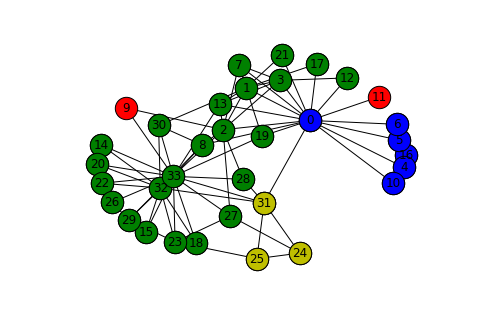

In [72]:
# community detection
pos_kcg=nx.spring_layout(kcg)
community_list=list(nx.k_clique_communities(kcg, 3))   # k=3

nx.draw(kcg,pos_kcg,with_labels=True, node_size = 500)

nx.draw_networkx_nodes(kcg,pos_kcg,nodelist=community_list[0], node_size=500, node_color='g', with_labels=True)
nx.draw_networkx_nodes(kcg,pos_kcg,nodelist=community_list[1], node_size=500, node_color='y', with_labels=True)
nx.draw_networkx_nodes(kcg, pos_kcg,nodelist= community_list[2], node_size=500, node_color='b', with_labels=True)  
plt.show()